In [6]:
import pandas as pd

In [8]:
file_path = "/Users/ethanwu/Downloads/spotify-2023.csv"
spotify_data = pd.read_csv(file_path, encoding='ISO-8859-1')
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = [
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm'
]

# Check for missing values in the selected features
missing_values = spotify_data[features_to_normalize].isnull().sum()
print("Missing values in features to normalize:\n", missing_values)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
spotify_data[features_to_normalize] = scaler.fit_transform(spotify_data[features_to_normalize])

# Display summary statistics of normalized features to confirm scaling
print("Summary statistics of normalized features:\n", spotify_data[features_to_normalize].describe())

Missing values in features to normalize:
 danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
bpm                   0
dtype: int64
Summary statistics of normalized features:
        danceability_%   valence_%    energy_%  acousticness_%  \
count      953.000000  953.000000  953.000000      953.000000   
mean         0.602323    0.510014    0.628172        0.278945   
std          0.200419    0.252480    0.188074        0.268001   
min          0.000000    0.000000    0.000000        0.000000   
25%          0.465753    0.301075    0.500000        0.061856   
50%          0.630137    0.505376    0.647727        0.185567   
75%          0.753425    0.709677    0.772727        0.443299   
max          1.000000    1.000000    1.000000        1.000000   

       instrumentalness_%  liveness_%  speechiness_%         bpm  
count          953.000000  953.000000     953.000000  95

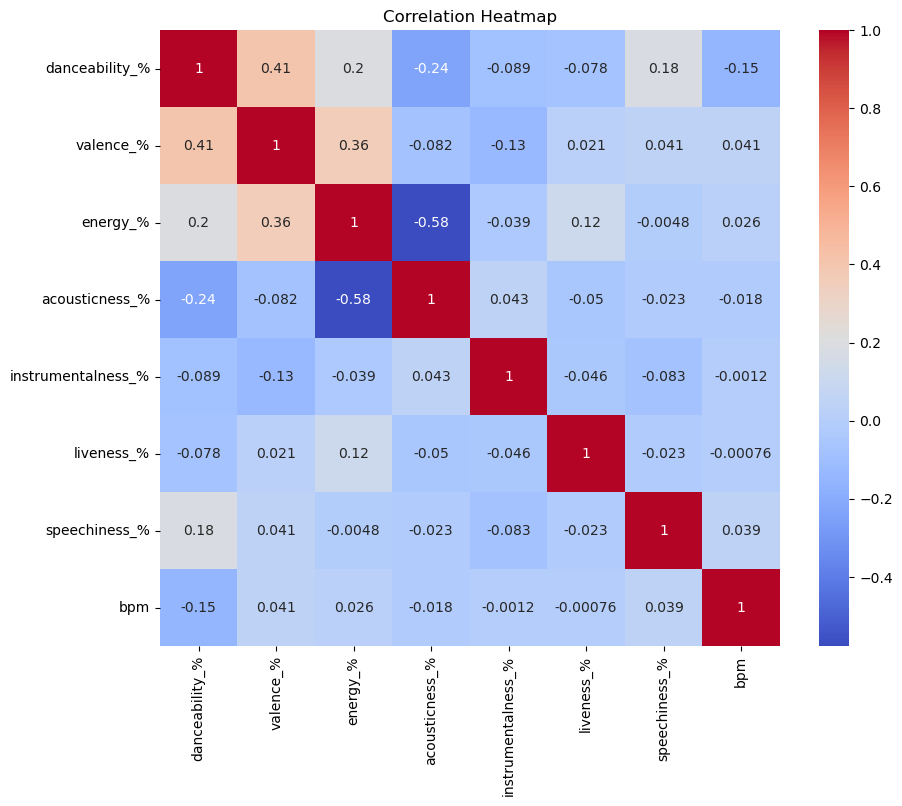

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spotify_data[features_to_normalize].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
from sklearn.neighbors import NearestNeighbors

# Define the selected features for the KNN model (based on the heatmap insights)
selected_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']

# Extract the feature matrix
X = spotify_data[selected_features].values

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X)

# Define a function to recommend songs based on the KNN model
def recommend_songs(song_index, n_recommendations=5):
    distances, indices = knn.kneighbors([X[song_index]])
    recommendations = spotify_data.iloc[indices[0]]
    return recommendations[['track_name', 'artist(s)_name', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']]

# Test the recommendation system with the first song in the dataset
recommended_songs = recommend_songs(0, 5)
recommended_songs

,track_name,artist(s)_name,danceability_%,valence_%,energy_%,acousticness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.780822,0.913978,0.840909,0.319588
220,Las Morras,"BLESSD, Peso Pluma",0.753425,0.924731,0.852273,0.319588
274,Shivers,Ed Sheeran,0.767123,0.838710,0.875000,0.288660
39,TQM,Fuerza Regida,0.767123,0.989247,0.863636,0.278351
745,Me Arrepentï¿,"Ak4:20, Cris Mj, Pailita",0.863014,0.935484,0.795455,0.298969
